In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from vecstack import stacking
from xgboost import XGBClassifier
from PIL import Image

In [3]:
dir = '../input/classification/Face Mask Dataset - Copy'

In [4]:
Class=['WithMask', 'WithoutMask']
data = []

In [5]:
for i in Class:
    path = os.path.join(dir,i)
    label = Class.index(i)

    for img in os.listdir(path):
        impath = os.path.join(path,img)
        mask_img=cv2.imread(impath,0)
        mask_img=cv2.resize(mask_img,(128,128))
        image = np.array(mask_img).flatten()
        data.append([image,label])

In [6]:
print(len(data))

10000


In [7]:
print(data[34])

[array([108, 106, 105, ...,  99,  94,  93], dtype=uint8), 0]


In [8]:
pick_in = open('x.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close()

In [9]:
pick_in = open('x.pickle','rb')
data = pickle.load(pick_in)
pick_in.close()

In [10]:
print(data[6000])

[array([102,  82,  71, ...,  54,  59,  68], dtype=uint8), 1]


In [11]:
features = []
labels = []
random.shuffle(data)

In [12]:
for feature, label in data:
    features.append(feature)
    labels.append(label)

In [13]:
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = 0.25)

**SUPPORT VECTOR MACHINE**

In [14]:
model = SVC(C=1, gamma = 'auto', kernel = 'poly')
model.fit(xtrain, ytrain)

SVC(C=1, gamma='auto', kernel='poly')

In [15]:
pred = model.predict(xtest)

<function matplotlib.pyplot.show(close=None, block=None)>

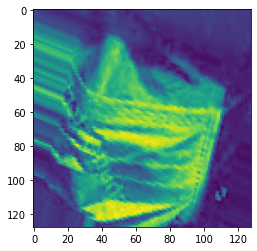

In [16]:
mask= xtest[66].reshape(128,128)
plt.imshow(mask)
plt.show

In [17]:
print(" the above image is "+Class[pred[66]])

 the above image is WithoutMask


<function matplotlib.pyplot.show(close=None, block=None)>

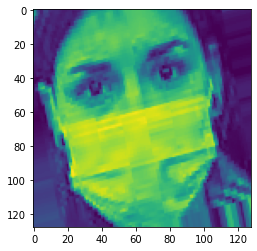

In [18]:
mask= xtest[78].reshape(128,128)
plt.imshow(mask)
plt.show

In [19]:
print(" the above image is "+Class[pred[78]])

 the above image is WithMask


              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1249
           1       0.86      0.93      0.90      1251

    accuracy                           0.89      2500
   macro avg       0.89      0.89      0.89      2500
weighted avg       0.89      0.89      0.89      2500



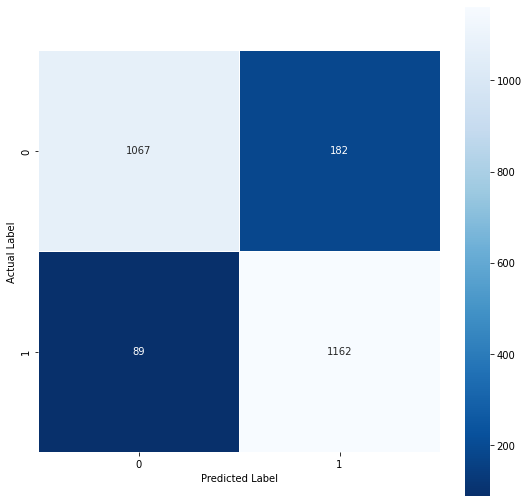

In [20]:
cm = metrics.confusion_matrix(ytest, pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(metrics.classification_report(ytest, pred))

**RANDOM FOREST CLASSIFIER**

In [21]:
rf=RandomForestClassifier(n_estimators=500, min_samples_split = 20, max_features = 5)

In [22]:
rf.fit(xtrain, ytrain)

RandomForestClassifier(max_features=5, min_samples_split=20, n_estimators=500)

In [23]:
pick = open('rf_model_20.sav','wb')
pickle.dump(rf,pick)
pick.close()

In [24]:
pred = rf.predict(xtest)
acc = rf.score(xtest,ytest)

<function matplotlib.pyplot.show(close=None, block=None)>

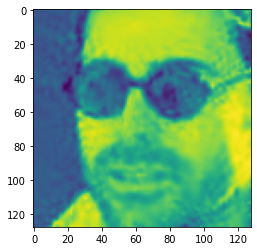

In [25]:
mask= xtest[600].reshape(128,128)
plt.imshow(mask)
plt.show

In [26]:
print(Class[pred[600]])

WithMask


In [27]:
mask_img1=cv2.imread('../input/test-me/WhatsApp Image 2022-05-19 at 7.55.41 PM.jpeg',0)
mask_img1=cv2.resize(mask_img1,(128,128))

<function matplotlib.pyplot.show(close=None, block=None)>

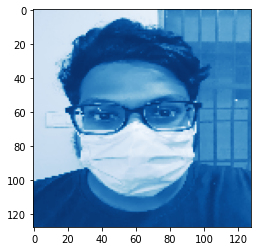

In [28]:
plt.imshow(mask_img1, cmap='Blues_r')
plt.show

In [29]:
mask_img1 = mask_img1.reshape(1,-1)

In [30]:
pred1 = model.predict(mask_img1)
print(Class[pred1[0]])

WithMask


              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1249
           1       0.96      0.84      0.90      1251

    accuracy                           0.90      2500
   macro avg       0.91      0.90      0.90      2500
weighted avg       0.91      0.90      0.90      2500



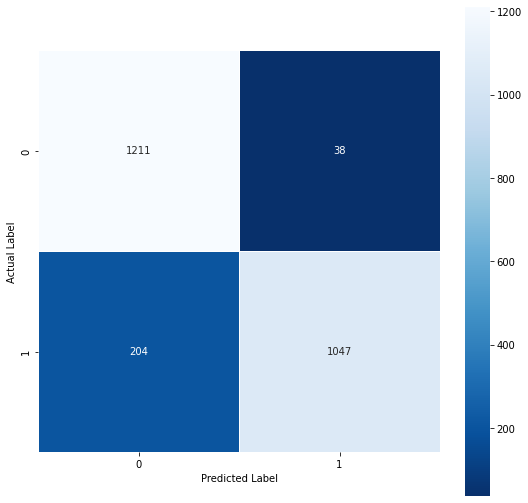

In [31]:
cm = metrics.confusion_matrix(ytest, pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(metrics.classification_report(ytest, pred))

In [32]:
mask_img2=cv2.imread('../input/test-mask/WhatsApp Image 2022-05-19 at 7.59.25 PM.jpeg',0)
mask_img2=cv2.resize(mask_img2,(128,128))

<function matplotlib.pyplot.show(close=None, block=None)>

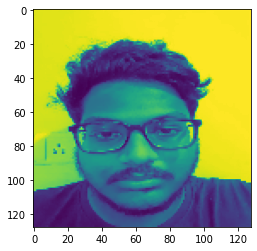

In [33]:
plt.imshow(mask_img2)
plt.show

In [34]:
mask_img2 = mask_img2.reshape(1,-1)

In [35]:
pred2 = model.predict(mask_img2)
print(Class[pred2[0]])

WithMask


**RF GOOD AT CLASSIFYING 0 WHEREAS SVM GOOD AT CLASSSFYING 1**

**XGBOOST**

In [36]:
xgb = XGBClassifier()
xgb.fit(xtrain, ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [37]:
pred_boost = xgb.predict(xtest)

<function matplotlib.pyplot.show(close=None, block=None)>

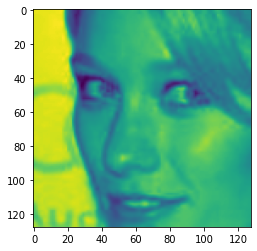

In [38]:
mask = xtest[45].reshape(128,128)
plt.imshow(mask)
plt.show

In [39]:
print(Class[pred_boost[45]])

WithoutMask


              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1249
           1       0.96      0.95      0.95      1251

    accuracy                           0.96      2500
   macro avg       0.96      0.96      0.96      2500
weighted avg       0.96      0.96      0.96      2500



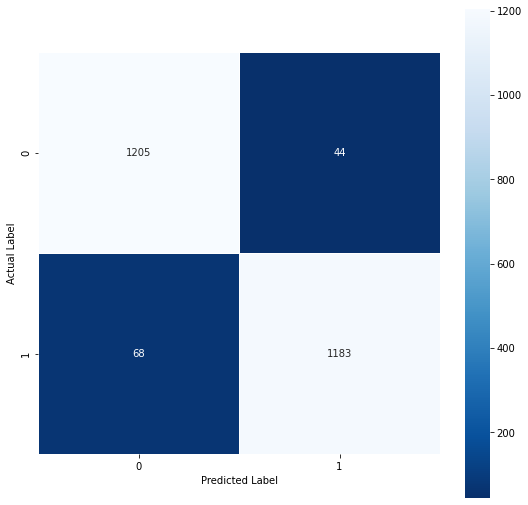

In [40]:
cm = metrics.confusion_matrix(ytest, pred_boost)

plt.figure(figsize=(9, 9))
sns.heatmap(cm, annot=True, fmt='.0f', square=True, linewidths=.5, cmap='Blues_r')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

print(metrics.classification_report(ytest, pred_boost))